# Data Gathering

In [1]:
import pandas as pd
from pandas import DataFrame as df
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dataset = pd.read_csv('winequality-red.csv')

In [3]:
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


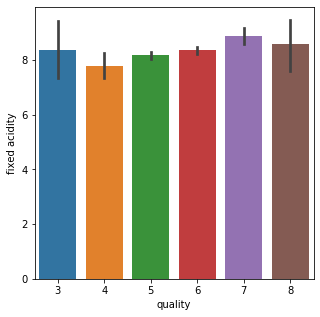

In [4]:
fig = plt.figure(figsize = (5,5))
sns.barplot(x = 'quality', y = 'fixed acidity', data = dataset)

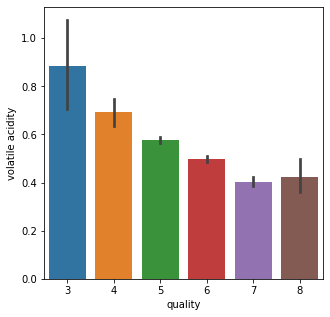

In [5]:
fig = plt.figure(figsize = (5,5))
sns.barplot(x = 'quality', y = 'volatile acidity', data = dataset)

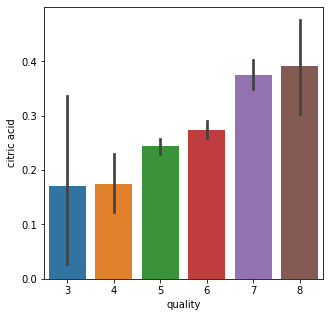

In [6]:
fig = plt.figure(figsize = (5,5))
sns.barplot(x = 'quality', y = 'citric acid', data = dataset)

# Data Preparation

In [7]:
dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
#Dividing wine as good and bad by giving the limit for the quality

bins = (2, 6.5, 8)
group_names = ['bad', 'good']
dataset['quality'] = pd.cut(dataset['quality'], bins = bins, labels = group_names)
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,bad
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
dataset['quality'] = encoder.fit_transform(dataset['quality'])

## Data Partition

In [10]:
column = dataset.columns
x = dataset[column]
x.drop('quality', axis=1,inplace=True)
y = dataset['quality']

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=6)
x_r = pca.fit_transform(x)
print('Total Explained Variance: ',pca.explained_variance_ratio_.sum())

Total Explained Variance:  0.9999615354947841


In [12]:
df(x_r).head()

,0,1,2,3,4,5
0,-13.224905,-2.023900,-1.126821,-0.399233,-1.085389,-0.198018
1,22.037724,4.408322,-0.310378,-0.199938,-0.557109,-0.301325
2,7.162673,-2.501461,-0.581868,-0.219069,-0.552934,-0.205114
3,13.430063,-1.951122,2.634040,-1.574059,-0.063806,0.089092
4,-13.224905,-2.023900,-1.126821,-0.399233,-1.085389,-0.198018


In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_r,y,
                    test_size=0.2,random_state=42)

## Feature Engineering

In [14]:
numeric_features = dataset.select_dtypes(include=[np.number])
numeric_features.dtypes
corr =numeric_features.corr()

print(corr['quality'].sort_values(ascending=False))

quality                 1.000000
alcohol                 0.407315
citric acid             0.214716
sulphates               0.199485
fixed acidity           0.120061
residual sugar          0.047779
pH                     -0.057283
free sulfur dioxide    -0.071747
chlorides              -0.097308
total sulfur dioxide   -0.139517
density                -0.150460
volatile acidity       -0.270712
Name: quality, dtype: float64


### Feature Scaling

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
x_train = df(scaler.fit_transform(x_train))
x_test = df(scaler.transform(x_test))

In [16]:
x_train.head()

,0,1,2,3,4,5
0,0.273420,0.475349,0.362231,0.185064,0.611193,0.369538
1,0.575763,0.456015,0.149623,0.079643,0.746593,0.587935
2,0.029877,0.444910,0.491331,0.081239,0.373670,0.511014
3,0.068586,0.563713,0.342548,0.084670,0.300805,0.373487
4,0.171458,0.387629,0.394929,0.395266,0.302554,0.237894


# Model Building

## Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=42).fit(x_train, y_train)

In [18]:
y_pred_lr = lr.predict(x_test)
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
print('Confusion Matrix:'+'\n' ,confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Confusion Matrix:
 [[271   2]
 [ 47   0]]
              precision    recall  f1-score   support

           0       0.85      0.99      0.92       273
           1       0.00      0.00      0.00        47

    accuracy                           0.85       320
   macro avg       0.43      0.50      0.46       320
weighted avg       0.73      0.85      0.78       320



## Decision Tree

In [19]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42).fit(x_train, y_train)

In [20]:
y_pred_dt = dt.predict(x_test)
print('Confusion Matrix:'+'\n',confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Confusion Matrix:
 [[249  24]
 [ 22  25]]
              precision    recall  f1-score   support

           0       0.92      0.91      0.92       273
           1       0.51      0.53      0.52        47

    accuracy                           0.86       320
   macro avg       0.71      0.72      0.72       320
weighted avg       0.86      0.86      0.86       320



## Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42).fit(x_train, y_train)

In [22]:
y_pred_rf = rf.predict(x_test)
print('Confusion Matrix:'+'\n' ,confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Confusion Matrix:
 [[266   7]
 [ 25  22]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       273
           1       0.76      0.47      0.58        47

    accuracy                           0.90       320
   macro avg       0.84      0.72      0.76       320
weighted avg       0.89      0.90      0.89       320



### Parameter Tuning

In [23]:
rf.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)>

In [24]:
k_range = range(1, 150)
scores = []

for k in k_range:
    knn = RandomForestClassifier(random_state=77, n_estimators=19, max_depth= k)
    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_test)
    scores.append(accuracy_score(y_test, y_pred))

max = np.array(scores).max()
m=[]
m = df(scores)
m[1] = k_range
print('Best Parameter: ')
print(m[m[0] == max].min())

Best Parameter: 
0     0.925
1    18.000
dtype: float64


### Selected Model

In [25]:
rf = RandomForestClassifier(random_state=77, n_estimators=19, max_depth=18).fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
print('Confusion Matrix:'+'\n' ,confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Confusion Matrix:
 [[269   4]
 [ 20  27]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       273
           1       0.87      0.57      0.69        47

    accuracy                           0.93       320
   macro avg       0.90      0.78      0.82       320
weighted avg       0.92      0.93      0.92       320



In [26]:
df({'Predicted':y_pred_dt,'Actual':y_test}).head(5)

,Predicted,Actual
803,0,0
124,0,0
350,0,0
682,0,0
1326,0,0


# Inference
Random Forest Classifier has high accuracy score of 92.5% than any other models.